<a href="https://colab.research.google.com/github/GattazSouza/modelagem_de_dados/blob/main/modelagem_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Lendo o dataset
dados = pd.read_csv("/content/Data - data (2).csv.csv", encoding= 'unicode_escape')
dados.head(10)

ParserError: Error tokenizing data. C error: Expected 8 fields in line 12476, saw 10


In [ ]:
# Verificando a descrição dos dados
dados.describe()

,Quantity,UnitPrice,CustomerID
count,75231.000000,75231.000000,46865.000000
mean,8.429225,5.639004,15345.435826
std,386.832608,136.234018,1763.733972
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13929.000000
50%,2.000000,2.510000,15311.000000
75%,8.000000,4.210000,16931.000000
max,74215.000000,16888.020000,18283.000000


In [ ]:
# Verificando quantidade de dados nulos
dados.isna().sum()

InvoiceNo          0
StockCode          0
Description      214
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     28367
Country            1
dtype: int64

In [ ]:
# Eliminando registros nulos
dados.dropna(axis=0, subset='CustomerID', inplace=True)

In [ ]:
# Eliminando quantidade de produtos e valor unitário menor ou igual a 10
dados.drop(dados.query('UnitPrice <= 0').index, axis=0, inplace=True)
dados.drop(dados.query('Quantity <= 0').index, axis=0, inplace=True)

In [ ]:
# Verificando registros duplicados
dados[dados.duplicated(keep=False)].sort_values('Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
601,536412,21448,12 DAISY PEGS IN WOOD BOX,2.0,12/1/2010 11:49,1.65,17920.0,United Kingdom
604,536412,21448,12 DAISY PEGS IN WOOD BOX,2.0,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1.0,12/1/2010 11:49,1.65,17920.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1.0,12/1/2010 11:49,1.65,17920.0,United Kingdom
565,536412,21448,12 DAISY PEGS IN WOOD BOX,2.0,12/1/2010 11:49,1.65,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
4615,536796,20719,WOODLAND CHARLOTTE BAG,1.0,12/2/2010 15:46,0.85,15574.0,United Kingdom
4602,536796,21578,WOODLAND DESIGN COTTON TOTE BAG,1.0,12/2/2010 15:46,2.25,15574.0,United Kingdom
4658,536796,21578,WOODLAND DESIGN COTTON TOTE BAG,1.0,12/2/2010 15:46,2.25,15574.0,United Kingdom
73915,542393,21169,YOU'RE CONFUSING ME METAL SIGN,1.0,1/27/2011 15:02,1.69,18125.0,United Kingdom


In [ ]:
# Removendo registros duplicados
dados.drop_duplicates(inplace=True)

In [ ]:
# Verificando a descrição dos novos dados
dados.describe()

,Quantity,UnitPrice,CustomerID
count,44833.000000,44833.000000,44833.000000
mean,14.332322,3.153415,15346.929048
std,353.557839,5.269484,1767.018343
min,1.000000,0.070000,12346.000000
25%,2.000000,1.250000,13941.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,16943.000000
max,74215.000000,295.000000,18283.000000


In [ ]:
# Reorganizando o dataframe e verificando informações sobre as colunas
dados.reset_index(inplace=True)
dados.drop('index', axis=1, inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44833 entries, 0 to 44832
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    44833 non-null  object 
 1   StockCode    44833 non-null  object 
 2   Description  44833 non-null  object 
 3   Quantity     44833 non-null  float64
 4   InvoiceDate  44833 non-null  object 
 5   UnitPrice    44833 non-null  float64
 6   CustomerID   44833 non-null  float64
 7   Country      44833 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.7+ MB


In [ ]:
# Alterando o tipo de dados em 'InvoiceDate' e 'CustomerID'
dados = dados.astype({'InvoiceDate': 'datetime64[ns]', 'CustomerID': 'int64'})

In [ ]:
# Verificando se os tipos foram alterados corretamente
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44833 entries, 0 to 44832
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    44833 non-null  object        
 1   StockCode    44833 non-null  object        
 2   Description  44833 non-null  object        
 3   Quantity     44833 non-null  float64       
 4   InvoiceDate  44833 non-null  datetime64[ns]
 5   UnitPrice    44833 non-null  float64       
 6   CustomerID   44833 non-null  int64         
 7   Country      44833 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.7+ MB


In [ ]:
# Verificando a tabela após o tratamento inicial
dados

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
44828,542543,22149,FELTCRAFT 6 FLOWER FRIENDS,6.0,2011-01-28 14:42:00,2.10,13141,United Kingdom
44829,542543,22457,NATURAL SLATE HEART CHALKBOARD,12.0,2011-01-28 14:42:00,2.95,13141,United Kingdom
44830,542543,22301,COFFEE MUG CAT + BIRD DESIGN,6.0,2011-01-28 14:42:00,2.55,13141,United Kingdom
44831,542543,22300,COFFEE MUG DOG + BALL DESIGN,6.0,2011-01-28 14:42:00,2.55,13141,United Kingdom


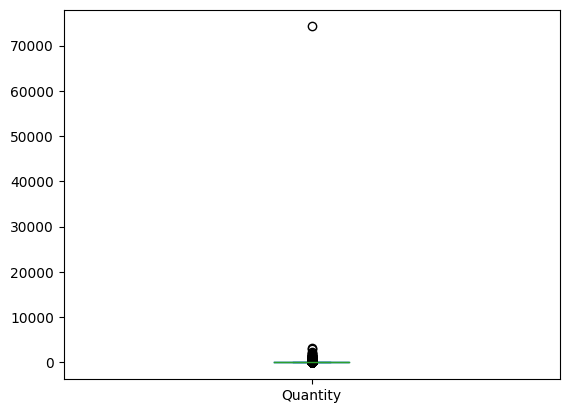

In [ ]:
# Verificando distribuição em 'Quantity'
dados['Quantity'].plot.box();

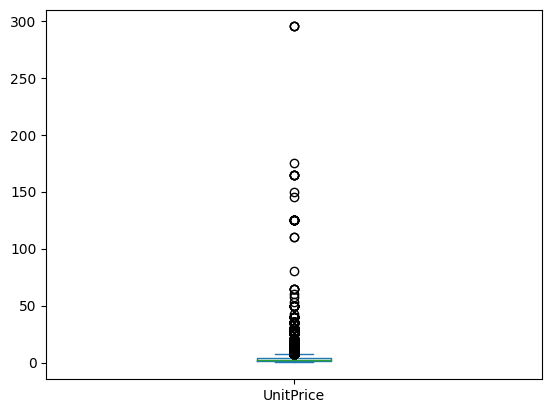

In [ ]:
# Verificando distribuição em 'UnitPrice'
dados['UnitPrice'].plot.box();

In [ ]:
# Eliminando outliers de 'Quantity' e 'UnitPrice
dados.drop(dados.query('Quantity > 10000').index, axis=0, inplace=True)
dados.drop(dados.query('UnitPrice > 5000').index, axis=0, inplace=True)

In [ ]:
# Reorganizando o df
dados.reset_index(inplace=True)
dados.drop('index', axis=1, inplace=True)

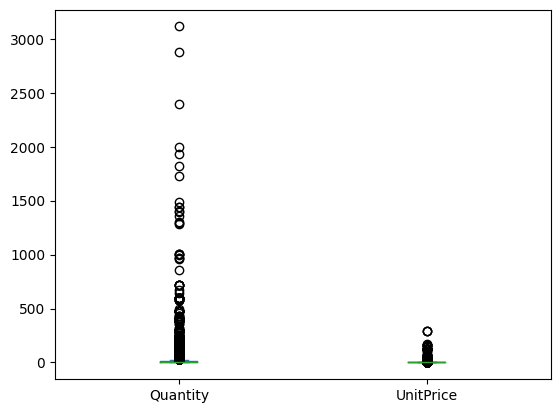

In [ ]:
# Plotando a distribuição de 'Quantity' e 'UnitPrice' sem outliers
dados[['Quantity', 'UnitPrice']].plot.box();

In [ ]:
# Criando nova feature 'Total' com valores de 'Quantity' e 'UnitPrice'
dados['Total'] = dados['Quantity'] * dados['UnitPrice']

In [ ]:
#Verificando a descrição dos dados tratados
dados[['Quantity', 'UnitPrice', 'Total']].describe().style.format('{:.2f}')

,Quantity,UnitPrice,Total
count,44832.00,44832.00,44832.00
mean,12.68,3.15,23.05
std,46.82,5.27,89.25
min,1.00,0.07,0.14
25%,2.00,1.25,4.95
50%,5.00,1.95,11.90
75%,12.00,3.75,19.80
max,3114.00,295.00,6539.40


In [ ]:
# Verificando a nova tabela
dados

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
44827,542543,22149,FELTCRAFT 6 FLOWER FRIENDS,6.0,2011-01-28 14:42:00,2.10,13141,United Kingdom,12.60
44828,542543,22457,NATURAL SLATE HEART CHALKBOARD,12.0,2011-01-28 14:42:00,2.95,13141,United Kingdom,35.40
44829,542543,22301,COFFEE MUG CAT + BIRD DESIGN,6.0,2011-01-28 14:42:00,2.55,13141,United Kingdom,15.30
44830,542543,22300,COFFEE MUG DOG + BALL DESIGN,6.0,2011-01-28 14:42:00,2.55,13141,United Kingdom,15.30


In [ ]:
# Retornando a data da última compra
lastdate = dados['InvoiceDate'].max()
lastdate

Timestamp('2011-01-28 14:45:00')

In [ ]:
# Agrupando o total vendido por país
agg_count = dados.groupby(['Country'])['Total'].agg('sum').reset_index().sort_values('Total', ascending=False)
agg_count.reset_index(inplace=True)
agg_count.drop('index', axis=1, inplace=True)
agg_count

,Country,Total
0,United Kingdom,838791.44
1,Netherlands,35261.16
2,EIRE,30718.07
3,Germany,29754.37
4,France,23764.46
5,Spain,11929.82
6,Australia,9983.06
7,Japan,7705.07
8,Sweden,7320.62
9,Portugal,6495.68


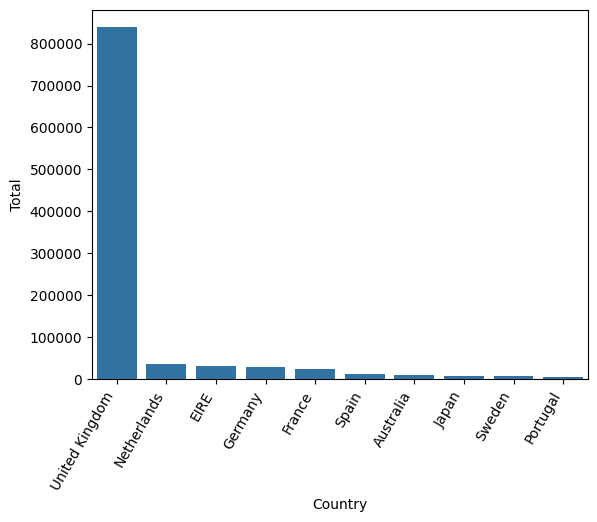

In [ ]:
# Retornando o TOP10
top_count = agg_count.loc[agg_count.index <= 9]

# Plotando o gráfico com o TOP10
sns.barplot(data=top_count, x='Country', y='Total')
plt.xticks(rotation=60, ha='right');

In [ ]:
# Agrupando a quantidade de produtos vendidos por produto
agg_prod = dados.groupby(['StockCode'])['Quantity'].agg('sum').reset_index().sort_values('Quantity', ascending=False)
agg_prod.reset_index(inplace=True)
agg_prod.drop('index', axis=1, inplace=True)
agg_prod

,StockCode,Quantity
0,85123A,8921.0
1,21212,6744.0
2,84077,6579.0
3,85099B,4640.0
4,22492,4392.0
...,...,...
2607,22103,1.0
2608,84859A,1.0
2609,90123A,1.0
2610,22137,1.0


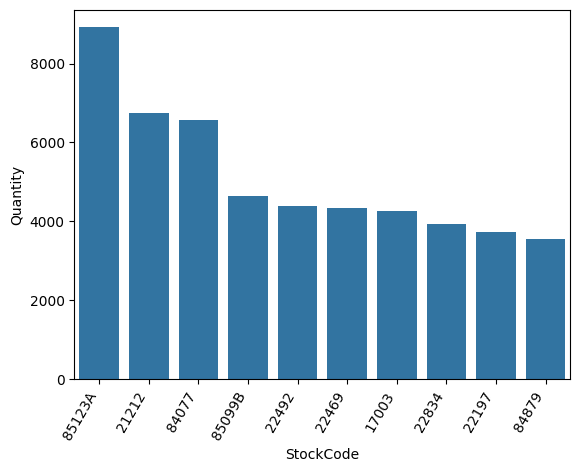

In [ ]:
# Retornando o TOP10
top_prod = agg_prod.loc[agg_prod.index <= 9]

#Plotando o TOP10 +Vendidos
sns.barplot(data=top_prod, x='StockCode', y='Quantity')
plt.xticks(rotation=60, ha='right');

In [ ]:
# Agrupando a quantidade e o valor total vendido por mês
dados_alt = dados.set_index('InvoiceDate').sort_index()
agg_date = dados_alt[['Quantity', 'Total']].resample('M').sum()
agg_date

,Quantity,Total
InvoiceDate,,
2010-12-31,311048.0,570422.73
2011-01-31,257298.0,462853.82


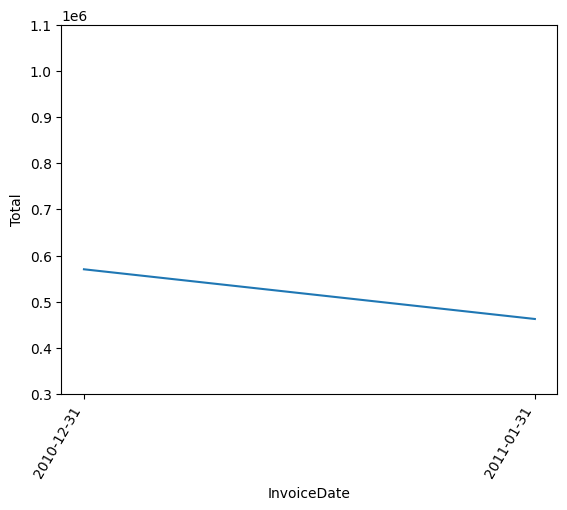

In [ ]:
#Plotando o total vendido por mês
sns.lineplot(data=agg_date, x=agg_date.index, y='Total')
plt.xticks(agg_date.index, rotation=60, ha='right')
plt.yticks(np.arange(300000, 1200000, step=100000));

In [ ]:
# Filtrando os dados de vendas feitas nos TOP10 países
dados_alt['Period'] = dados_alt.index.strftime('%m/%Y')
dados_alt = dados_alt[dados_alt['Country'].isin(top_count['Country'])]
dados_alt

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total,Period
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850,United Kingdom,15.30,12/2010
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6.0,3.39,17850,United Kingdom,20.34,12/2010
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,17850,United Kingdom,22.00,12/2010
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850,United Kingdom,20.34,12/2010
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850,United Kingdom,20.34,12/2010
...,...,...,...,...,...,...,...,...,...
2011-01-28 14:42:00,542543,22149,FELTCRAFT 6 FLOWER FRIENDS,6.0,2.10,13141,United Kingdom,12.60,01/2011
2011-01-28 14:42:00,542543,22457,NATURAL SLATE HEART CHALKBOARD,12.0,2.95,13141,United Kingdom,35.40,01/2011
2011-01-28 14:42:00,542543,22301,COFFEE MUG CAT + BIRD DESIGN,6.0,2.55,13141,United Kingdom,15.30,01/2011


In [ ]:
# Agregando os dados por País e Mês
agg_mt = dados_alt.groupby(['Country', 'Period'])['Total'].agg('sum')
agg_mt = agg_mt.reset_index()
agg_mt['Period'] = pd.to_datetime(agg_mt['Period'], format='%m/%Y')
agg_mt = agg_mt.sort_values('Period')
agg_mt

,Country,Period,Total
18,United Kingdom,2010-12-01,496477.34
1,Australia,2010-12-01,965.35
16,Sweden,2010-12-01,3834.30
3,EIRE,2010-12-01,8813.88
5,France,2010-12-01,9616.31
14,Spain,2010-12-01,1843.73
7,Germany,2010-12-01,15205.74
8,Japan,2010-12-01,7705.07
10,Netherlands,2010-12-01,8784.48
12,Portugal,2010-12-01,2439.97


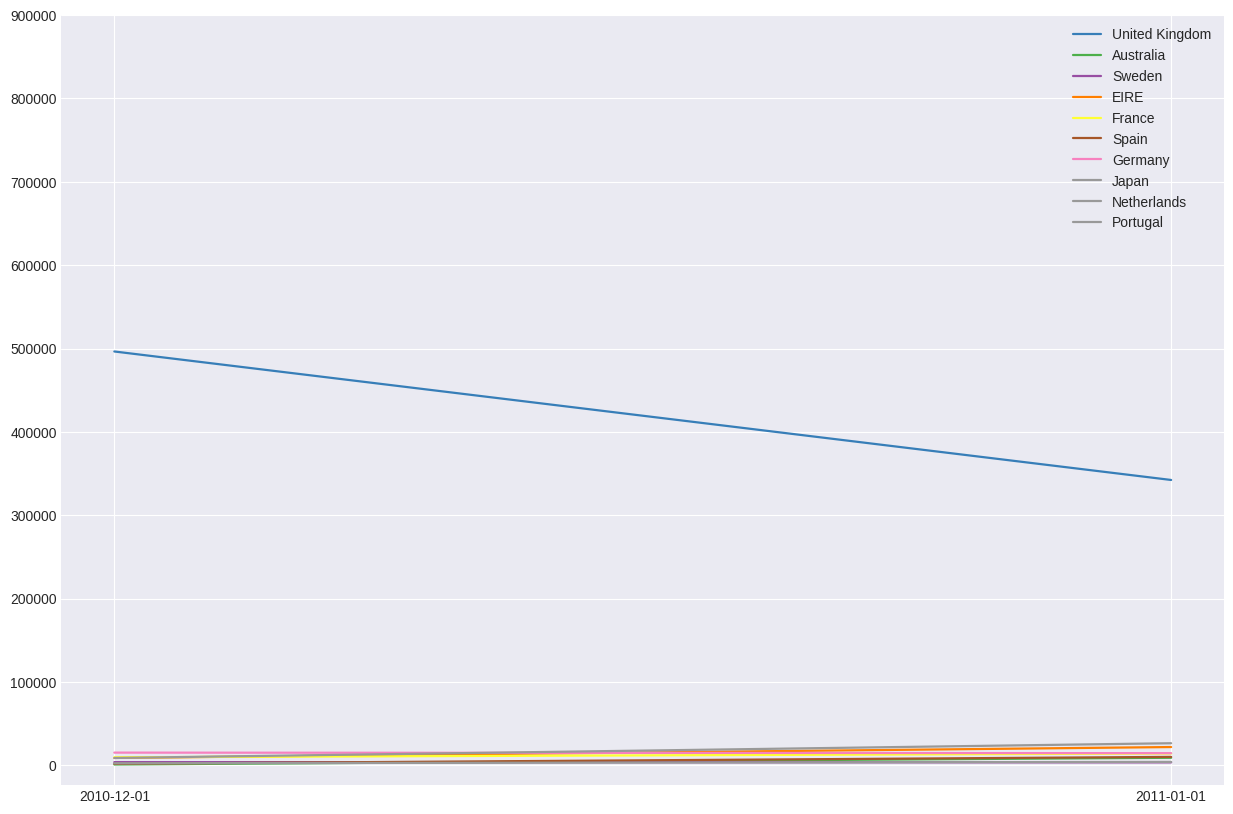

In [ ]:
# Plotando um gráfico para cada país com o total vendido por mês
plt.figure(figsize=(15,10))
plt.style.use('seaborn-v0_8-darkgrid')
palette = plt.get_cmap('Set1')
n = 0
for value in agg_mt['Country'].unique():
  n += 1
  country = agg_mt.loc[agg_mt['Country'] == value]
  plt.plot(country['Period'], country['Total'], marker='', color=palette(n), linewidth=1.6, alpha=1, label=value)
  plt.xticks(ticks=country['Period'])
  plt.yticks(ticks=np.arange(0, 1000000, step=100000))
  plt.legend();

In [ ]:
# Agrupando dados de quantidade e valor vendido por Cliente, Compra e Data
rfm = dados.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate'])[['Quantity', 'Total']].agg('sum').reset_index()
rfm = rfm.sort_values('CustomerID')
rfm

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Total
0,12347,537626,2010-12-07 14:57:00,319.0,711.79
1,12347,542237,2011-01-26 14:30:00,315.0,475.39
2,12348,539318,2010-12-16 19:09:00,1254.0,892.80
3,12348,541998,2011-01-25 10:42:00,601.0,227.44
4,12356,541430,2011-01-18 09:50:00,1216.0,2271.62
...,...,...,...,...,...
2299,18260,540539,2011-01-09 14:42:00,429.0,557.07
2298,18260,539315,2010-12-16 18:23:00,58.0,230.70
2300,18269,537817,2010-12-08 13:53:00,76.0,168.60
2301,18283,540350,2011-01-06 14:14:00,61.0,108.45


In [ ]:
# Calculando somente a Recência de cada cliente
r_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'LastPurchase': customer['InvoiceDate'].max()}
    r_only.append(values)

r_only = pd.DataFrame(r_only)
r_only['Recency'] = (lastdate - r_only['LastPurchase']).dt.days
r_only.drop('LastPurchase', axis=1, inplace=True)
r_only

,CustomerID,Recency
0,12347,2
1,12348,3
2,12356,10
3,12359,16
4,12370,42
...,...,...
1265,18245,39
1266,18259,51
1267,18260,19
1268,18269,51


In [ ]:
# Calculando somente a Frequência de cada Cliente
f_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'Frequency': customer['InvoiceNo'].count()}
    f_only.append(values)

f_only = pd.DataFrame(f_only)
f_only

,CustomerID,Frequency
0,12347,2
1,12348,2
2,12356,1
3,12359,1
4,12370,2
...,...,...
1265,18245,1
1266,18259,1
1267,18260,2
1268,18269,1


In [ ]:
# Calculando somente o valor médio gasto por cliente
m_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'Monetary': customer['Total'].mean()}
    m_only.append(values)

m_only = pd.DataFrame(m_only)
m_only

,CustomerID,Monetary
0,12347,593.590
1,12348,560.120
2,12356,2271.620
3,12359,547.500
4,12370,932.135
...,...,...
1265,18245,365.730
1266,18259,376.300
1267,18260,393.885
1268,18269,168.600


In [ ]:
# Criando a tabela final com o RFM completo
final_rfm = r_only.merge(f_only, left_on='CustomerID', right_on='CustomerID')
final_rfm = final_rfm.merge(m_only, left_on='CustomerID', right_on='CustomerID')
final_rfm.head(10).style.format('{:.2f}', subset='Monetary')

,CustomerID,Recency,Frequency,Monetary
0,12347,2,2,593.59
1,12348,3,2,560.12
2,12356,10,1,2271.62
3,12359,16,1,547.50
4,12370,42,2,932.13
5,12377,39,1,1001.52
6,12383,16,2,625.94
7,12386,22,2,200.95
8,12388,11,1,431.30
9,12393,14,2,319.75
